## Environment Setting

In [1]:
# External API
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np

# Part of External API
from operator import itemgetter
from pandas import Series, DataFrame
import pandas as pd

# Own code API
import TextminingPlsa
from stopwords import stopwords

## Load Data Set

In [2]:
df = pd.read_csv('./data/pre_review3.csv', encoding='cp949') # orginal pre_review.csv
print(df.shape)
df.head()

(15000, 2)


,Unnamed: 0,review
0,0,ask
1,1,morning
2,2,love
3,3,get
4,4,list


In [3]:
df_w = pd.read_csv('./data/Walmart_word.csv', encoding='cp949')
print(df_w.shape)
df_w.head()

(14877, 2)


,Unnamed: 0,col
0,0,amaze
1,1,product
2,2,accuracy
3,3,recognize
4,4,say


In [4]:
df = df.drop(df.columns[0], axis = 1)
print(df.shape)

(15000, 1)


In [5]:
df_w = df_w.drop(df_w.columns[0], axis = 1)
print(df_w.shape)

(14877, 1)


## Implementation of pLSA

In [6]:
corpus = TextminingPlsa.Corpus()

In [7]:
preList = df[df.columns[0]].values.tolist()
print(len(preList))

15000


In [8]:
walList = df_w['col'].values.tolist()
print(len(walList))

14877


In [9]:
len(stopwords)

588

In [10]:
stopPreList = [word for word in preList if word not in stopwords]
print(len(preList))

15000


In [11]:
stopWalList = [word for word in walList if word not in stopwords]
print(len(stopWalList))

7924


In [12]:
corpus.add_document(stopPreList)
corpus.add_document(stopWalList)

In [13]:
voca = corpus.build_vocabulary()
print(len(voca))

3263


In [14]:
def visualization_likelihod(value_list):
    plt.plot(value_list, c="b", lw=2, ls="--", marker="o", ms=5, mec="g", mew=2, mfc="r")

    plt.xlabel('$Iteration$', fontsize=14)
    plt.title('Log-Likelihood for Optimization', fontsize=20)
    plt.ylabel('$Value$', fontsize=14)
    plt.tight_layout()
    plt.show()

In [15]:
result = corpus.plsa(number_of_topics=2, max_iter=100, lambda_b=0.6) # all data set:0.6
print(result[2].shape, result[3].shape)

EM iteration begins...
Initializing...
Iteration #1...
Iteration #2...
Iteration #3...
Iteration #4...
Iteration #5...
Iteration #6...
Iteration #7...
Iteration #8...
Iteration #9...
Iteration #10...
Iteration #11...
Iteration #12...
Iteration #13...
Iteration #14...
Iteration #15...
Iteration #16...
Iteration #17...
Iteration #18...
Iteration #19...
Iteration #20...
Iteration #21...
Iteration #22...
Iteration #23...
Iteration #24...
Iteration #25...
Iteration #26...
Iteration #27...
Iteration #28...
Iteration #29...
Iteration #30...
Iteration #31...
Iteration #32...
Iteration #33...
Iteration #34...
Iteration #35...
Iteration #36...
Iteration #37...
Iteration #38...
Iteration #39...
Iteration #40...
Iteration #41...
Iteration #42...
Iteration #43...
Iteration #44...
Iteration #45...
Iteration #46...
Iteration #47...
Iteration #48...
Iteration #49...
Iteration #50...
Iteration #51...
Iteration #52...
Iteration #53...
Iteration #54...
Iteration #55...
Iteration #56...
Iteration #57...
I

In [16]:
result[0]

0.6

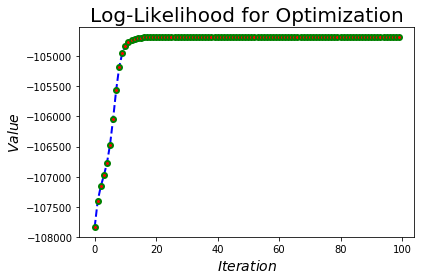

In [17]:
visualization_likelihod(result[1])

In [18]:
topic_word_list = []
for row in range(result[2].shape[0]):
    for col in range(result[2].shape[1]):
        topic_word_list.append((voca[col], result[2][row][col]))

print(len(topic_word_list), topic_word_list)

6526 [('carry', 0.0), ('subject', 8.8778829846448051e-05), ('dust', 5.2736930959150447e-07), ('trigger', 0.002047658102431787), ('commercials', 0.0), ('expanded', 0.0), ('review', 2.1901485506980315e-10), ('larger', 0.0), ('aide', 0.0), ('pizza', 8.8778829846448119e-05), ('ship', 0.0006472314818220102), ('battery', 0.00026633648953934444), ('sensational', 0.0), ('cave', 0.0), ('responds', 3.8901320793407209e-07), ('initial', 0.00017755765969289629), ('wanted', 0.0), ('bog', 0.0), ('presence', 0.00018615073658470794), ('briefly', 0.00018615073658470794), ('alot', 0.00083338223328228034), ('bang', 0.0), ('enhanced', 0.0), ('tininess', 0.00018615073658470794), ('emerge', 0.00018615073658470794), ('speak', 0.001924509421204777), ('invested', 0.0), ('amazingly', 0.0), ('potential', 7.1567802566558852e-05), ('scary', 0.0), ('therapy', 0.0), ('score', 0.0), ('months', 0.0), ('quibble', 0.0), ('right', 0.002732113496819732), ('residence', 0.00018615073658470794), ('reson', 0.000186150736584707

In [19]:
topic1 = topic_word_list[:1*len(voca)]
topic2 = topic_word_list[1*len(voca):2*len(voca)]
#topic3 = topic_word_list[2*len(voca):3*len(voca)]
#topic4 = topic_word_list[3*len(voca):4*len(voca)]

In [20]:
topic1= sorted(topic1, key=itemgetter(1), reverse=True)
topic1_word = [wordFreq[0] for wordFreq in topic1]
topic2 =sorted(topic2, key=itemgetter(1), reverse=True)
topic2_word = [wordFreq[0] for wordFreq in topic2]
#topic3 =sorted(topic3, key=itemgetter(1), reverse=True)
#topic3_word = [wordFreq[0] for wordFreq in topic3]
#topic4 =sorted(topic4, key=itemgetter(1), reverse=True)
#topic4_word = [wordFreq[0] for wordFreq in topic4]

In [21]:
making_data = {
    'Topic1': [topic1_word[0], topic1_word[1], topic1_word[2], topic1_word[3], topic1_word[4]],
    'Topic2': [topic2_word[0], topic2_word[1], topic2_word[2], topic2_word[3], topic2_word[4]]
    #'Topic3': [topic3_word[0], topic3_word[1], topic3_word[2], topic3_word[3], topic3_word[4]],
    #'Topic4': [topic4_word[0], topic4_word[1], topic4_word[2], topic4_word[3], topic4_word[4]]
}

In [22]:
result_data = DataFrame(making_data)
print(result_data)

     Topic1   Topic2
0    google     echo
1      home  quality
2     light   amazon
3    amazon     room
4  calendar   volume


In [23]:
df1 = pd.DataFrame(topic1)
df2 = pd.DataFrame(topic2)
#df3 = pd.DataFrame(topic3)
#df4 = pd.DataFrame(topic4)

In [24]:
resultTable = pd.concat([df1,df2], axis=1)
resultTable

,0,1,0,1
0,google,0.103494,echo,0.060585
1,home,0.057291,quality,0.018484
2,light,0.011793,amazon,0.013783
3,amazon,0.007506,room,0.007454
4,calendar,0.007331,volume,0.007029
5,list,0.006767,listen,0.005843
6,learn,0.006616,house,0.005542
7,search,0.005533,learning,0.005099
8,purchase,0.005138,prime,0.004408
9,family,0.005118,listening,0.004276


In [25]:
resultTable.to_csv('./result/topic_modeling_result.csv')